<a href="https://colab.research.google.com/github/pjcaro85/-Advanced-Machine-Learning-and-Signal-Processing/blob/master/Practica2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importamos modulos
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
from scipy.cluster.hierarchy import dendrogram, linkage

# **Practica 2 : Aprendizaje supervido**

##**Datos**:
 Datos sobre el contagio de Dengue en dos ciudades (San Juan e Iquitos) según  datos meteorológicos. Estos datos son de una competición del sitio DrivenData (https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/ ). Se utilizarán los datos de entrenamiento (Training Data Features: https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv).

##**Objetivo**: 
Utilizar técnicas de aprendizaje no supervisado para realizar una exploración preliminar de los datos y extraer conclusiones a partir de elementos descartables, etc.

##**Técnica a utilizar**:
 Técnicas de aprendizaje no supervisado de las vistas en la asignatura.

#Dataset

In [7]:
#Lectura del dataset

df1= pd.read_csv('dengue_features_train.csv')
df1.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
df2= pd.read_csv('dengue_labels_train.csv')
df2.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6



**Indicadores de ciudad y fecha**<br>
•	city- Abreviaturas de la ciudad: sjpara San Juan y iqpara Iquitos<br>
•	week_start_date - Fecha dada en formato aaaa-mm-dd<br>
**Mediciones diarias de la estación meteorológica de datos climáticos GHCN de la NOAA**<br>
•	station_max_temp_c - Temperatura máxima<br>
•	station_min_temp_c - Temperatura mínima<br>
•	station_avg_temp_c - Temperatura media<br>
•	station_precip_mm - Precipitación total<br>
•	station_diur_temp_rng_c - Rango de temperatura diurna<br>
**Medidas de precipitación por satélite PERSIANN (escala de 0,25x0,25 grados**)<br>
•	precipitation_amt_mm - Precipitación total<br>
**Mediciones de reanálisis del sistema de pronóstico climático NCEP de NOAA (escala de 0.5x0.5 grados)**<br>
•	reanalysis_sat_precip_amt_mm - Precipitación total<br>
•	reanalysis_dew_point_temp_k - Temperatura media del punto de rocío<br>
•	reanalysis_air_temp_k - Temperatura media del aire<br>
•	reanalysis_relative_humidity_percent - Humedad relativa media<br>
•	reanalysis_specific_humidity_g_per_kg - Humedad media específica<br>
•	reanalysis_precip_amt_kg_per_m2 - Precipitación total<br>
•	reanalysis_max_air_temp_k - Temperatura máxima del aire<br>
•	reanalysis_min_air_temp_k - Temperatura mínima del aire<br>
•	reanalysis_avg_temp_k - Temperatura media del aire<br>
•	reanalysis_tdtr_k - Rango de temperatura diurna<br>
**Vegetación satelital - Índice de vegetación de diferencia normalizada (NDVI) - Medidas del índice de vegetación de diferencia normalizada CDR de NOAA (escala de 0.5x0.5 grados**)<br>
•	ndvi_se - Pixel al sureste del centroide de la ciudad<br>
•	ndvi_sw - Pixel al suroeste del centroide de la ciudad<br>
•	ndvi_ne - Pixel al noreste del centroide de la ciudad<br>
•	ndvi_nw - Pixel al noroeste del centroide de la ciudad<br>




Cargamos tambien el archivo de test

In [9]:
df_test= pd.read_csv('dengue_features_test.csv')
df_test.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


# Preprocesado de datos

En este apartado se vera de manera general la informacion del dataset

##Datos

Se usa el método .info() para obtener datos crudos sobre los atributos del dataset y su contenido

In [10]:
# Vista de los tipos de datos y datos básicos

df1.info()

print("-------------------------------------")
print(f"Cantidad de filas: {df1.shape[0]}")
print(f"Cantidad de columnas: {df1.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [11]:
df2.info()

print("-------------------------------------")
print(f"Cantidad de filas: {df2.shape[0]}")
print(f"Cantidad de columnas: {df2.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB
-------------------------------------
Cantidad de filas: 1456
Cantidad de columnas: 4


In [12]:
#una vez comprobado que tiene el mismo numero de filas, unimos los dos dataset
df=pd.merge(df1,df2,on=['city', 'year', 'weekofyear'])
df.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
#cambiando temperatura
temperature_kelvin = [i for i in df.columns if i.find('_temp_k') > -1]
temperature_kelvin
for i in temperature_kelvin:
    df[i] = df[i] - 273.15
#se cambia el nombre a la variable
df.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in df.columns if i.find('_temp_k')]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_c,1446.0,25.551852,1.362420,21.485714,24.508929,25.496429,26.683571,29.050000
reanalysis_avg_temp_c,1446.0,26.075578,1.261715,21.742857,25.107143,26.139286,27.057143,29.778571
reanalysis_dew_point_temp_c,1446.0,22.096356,1.527810,16.492857,20.968929,22.490714,23.310000,25.300000


eliminaremos la columna 'week_start_date' ya que no deberíamos usarla como una función en nuestro modelo.

In [14]:
df. drop ( 'week_start_date' ,  axis = 1 ,  inplace = True )

Añadimos realizamos el preprocesado del archivo de test:

In [15]:
df_test.info()
print("-------------------------------------")
print(f"Cantidad de filas: {df_test.shape[0]}")
print(f"Cantidad de columnas: {df_test.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

In [16]:
#cambiando temperatura
temperature_kelvin = [i for i in df_test.columns if i.find('_temp_k') > -1]
temperature_kelvin
for i in temperature_kelvin:
    df_test[i] = df_test[i] - 273.15
#se cambia el nombre a la variable
df_test.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in df_test.columns if i.find('_temp_k')]
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
year,416.0,2010.766827,1.434835,2008.000000,2010.000000,2011.000000,2012.000000,2013.000000
weekofyear,416.0,26.439904,14.978257,1.000000,13.750000,26.000000,39.000000,53.000000
ndvi_ne,373.0,0.126050,0.164353,-0.463400,-0.001500,0.110100,0.263329,0.500400
ndvi_nw,405.0,0.126803,0.141420,-0.211800,0.015975,0.088700,0.242400,0.649000
ndvi_se,415.0,0.207702,0.079102,0.006200,0.148670,0.204171,0.254871,0.453043
ndvi_sw,415.0,0.201721,0.092028,-0.014671,0.134079,0.186471,0.253243,0.529043
precipitation_amt_mm,414.0,38.354324,35.171126,0.000000,8.175000,31.455000,57.772500,169.340000
reanalysis_air_temp_c,414.0,25.668295,1.469501,21.404286,24.601429,25.397143,27.090357,28.785714
reanalysis_avg_temp_c,414.0,26.203071,1.306233,22.085714,25.173214,26.178571,27.371429,30.178571
reanalysis_dew_point_temp_c,414.0,22.269179,1.523099,17.668571,21.185714,22.675000,23.493571,24.644286


In [17]:
df_test. drop ( 'week_start_date' ,  axis = 1 ,  inplace = True )

In [18]:
#Vista de los valores únicos en los atributos de tipo string

print(f"Valores presentes en el atributo: {df_test['city'].unique()} \n")

#Vista de la cantidad de ocurrencias de cada valor

print(f"Conteo de ocurrencias por valor:\n{df_test['city'].value_counts()}")

Valores presentes en el atributo: ['sj' 'iq'] 

Conteo de ocurrencias por valor:
sj    260
iq    156
Name: city, dtype: int64


##Outliers

Se analizó en la actividad anterior los outliers que habia y se creó algunas funciones que se volveran a utlizar aqui 

In [19]:
#quitando los nulos
df.fillna(method='ffill', inplace=True)
pd.isnull(df).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_c                    False
reanalysis_avg_temp_c                    False
reanalysis_dew_point_temp_c              False
reanalysis_max_air_temp_c                False
reanalysis_min_air_temp_c                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

In [20]:
#quitando los nulos para el test 
df_test.fillna(method='ffill', inplace=True)
pd.isnull(df_test).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_c                    False
reanalysis_avg_temp_c                    False
reanalysis_dew_point_temp_c              False
reanalysis_max_air_temp_c                False
reanalysis_min_air_temp_c                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

Reutilizamos las funciones para tratar outliers de la actividad anterior 

In [21]:
#grafica los outliers de las variables
def grafico_outliers(df_in):
  columns=df_in.columns
  plt.figure(figsize=(20,80))
  for i in range(0,columns.shape[0]):
    plt.subplot(20, 2, i+1)
    sns.boxplot(df_in[columns[i]])
  plt.show()

lowqe_bound=0
upper_bound=0

#cuartiles , minimos y maximos
def MinMax(df_in,column):
  Q1=df_in[column].quantile(0.25)
  Q3=df_in[column].quantile(0.75)
  IQR=Q3-Q1
  lowqe_bound=Q1 - 1.5 * IQR
  upper_bound=Q3 + 1.5 * IQR

  return lowqe_bound,upper_bound

#funcion para contar outliers
def num_outliers_column(df_in, column):
    lowqe_bound,upper_bound=MinMax(df_in,column)
    df_outliers = df_in.loc[(df_in[column] <= lowqe_bound) | (df_in[column] >= upper_bound)]
    return df_outliers.shape[0]


#numero de outliers totales por variables
def count_outliers(df_in):
  columns=df_in.columns
  total=0
  for i in range(0,columns.shape[0]):
  
    num=num_outliers_column(df_in,columns[i]) 
    total+=num
    print(f"Existen {num}  para {columns[i]}")
  print(f"Total: {total}")

#funcion para reemplazar outliers por nan 
def replace_nan_outliers(df_in,column):
  min,max=MinMax(df_in,column)
  for x in [column]:
      df_in.loc[df_in[x] < min,x] = np.nan
      df_in.loc[df_in[x] > max,x] = np.nan
  df_nan= df_in
  
  return df_nan

#Funcion para eliminar los outliers del dataset  
def remove_outliers(df_in,column):
    df_r=replace_nan_outliers(df_in,column)
    df_r.dropna(axis = 0)
    return df_r

#funcion para reemplazar los outliers por el valor anterior
def replace_outlier(df_in,column):
    df_r=replace_nan_outliers(df_in,column)
    df_r.fillna(method='ffill', inplace=True)
    return df_r

#fucnion para reemplazar los outliers por la media
def replace_outlier_med(df_in,column):
    df_r=replace_nan_outliers(df_in,column)
    df_r[column] = df_r[column].fillna((df_in[column].mean()))
    return df_r


Analizamos con ayuda de las funciones anterior, los dos dataset:

In [22]:
df_o=df.iloc[:,1:]
df_test_o=df_test.iloc[:,1:]

In [23]:
#contador de outliers
print(f"------Outliers para fichero train------")
count_outliers(df_o)
print(f"------Outliers para fichero test-------")
count_outliers(df_test_o)

------Outliers para fichero train------
Existen 0  para year
Existen 0  para weekofyear
Existen 9  para ndvi_ne
Existen 5  para ndvi_nw
Existen 23  para ndvi_se
Existen 35  para ndvi_sw
Existen 24  para precipitation_amt_mm
Existen 0  para reanalysis_air_temp_c
Existen 2  para reanalysis_avg_temp_c
Existen 7  para reanalysis_dew_point_temp_c
Existen 10  para reanalysis_max_air_temp_c
Existen 6  para reanalysis_min_air_temp_c
Existen 87  para reanalysis_precip_amt_kg_per_m2
Existen 2  para reanalysis_relative_humidity_percent
Existen 24  para reanalysis_sat_precip_amt_mm
Existen 1  para reanalysis_specific_humidity_g_per_kg
Existen 1  para reanalysis_tdtr_k
Existen 6  para station_avg_temp_c
Existen 3  para station_diur_temp_rng_c
Existen 4  para station_max_temp_c
Existen 17  para station_min_temp_c
Existen 82  para station_precip_mm
Existen 124  para total_cases
Total: 472
------Outliers para fichero test-------
Existen 0  para year
Existen 0  para weekofyear
Existen 1  para ndvi_ne
E

vemos que en los dos dataframe existen outliers que tenemos que tratar con funciones que se han definido .

In [43]:
#quitando outliers para train
df1=df_o
df1=replace_outlier_med(df1,'ndvi_ne')
df1=replace_outlier_med(df1,'ndvi_nw')
df1=replace_outlier_med(df1,'ndvi_se')
df1=replace_outlier_med(df1,'ndvi_sw')
df1=replace_outlier_med(df1,'precipitation_amt_mm')
df1=replace_outlier_med(df1,'reanalysis_avg_temp_c')
df1=replace_outlier_med(df1,'reanalysis_dew_point_temp_c')
df1=replace_outlier_med(df1,'reanalysis_max_air_temp_c')
df1=replace_outlier_med(df1,'reanalysis_min_air_temp_c')
df1=replace_outlier_med(df1,'reanalysis_precip_amt_kg_per_m2')
df1=replace_outlier_med(df1,'reanalysis_relative_humidity_percent')
df1=replace_outlier_med(df1,'reanalysis_sat_precip_amt_mm')
df1=replace_outlier_med(df1,'reanalysis_specific_humidity_g_per_kg')
df1=replace_outlier_med(df1,'reanalysis_tdtr_k')
df1=replace_outlier_med(df1,'station_avg_temp_c')
df1=replace_outlier_med(df1,'station_diur_temp_rng_c')
df1=replace_outlier_med(df1,'station_max_temp_c')
df1=replace_outlier_med(df1,'station_min_temp_c')
df1=replace_outlier_med(df1,'station_precip_mm')
df1=replace_outlier_med(df1,'total_cases')
count_outliers(df1)

Existen 0  para year
Existen 0  para weekofyear
Existen 0  para ndvi_ne
Existen 0  para ndvi_nw
Existen 0  para ndvi_se
Existen 0  para ndvi_sw
Existen 0  para precipitation_amt_mm
Existen 0  para reanalysis_air_temp_c
Existen 0  para reanalysis_avg_temp_c
Existen 0  para reanalysis_dew_point_temp_c
Existen 0  para reanalysis_max_air_temp_c
Existen 0  para reanalysis_min_air_temp_c
Existen 0  para reanalysis_precip_amt_kg_per_m2
Existen 0  para reanalysis_relative_humidity_percent
Existen 0  para reanalysis_sat_precip_amt_mm
Existen 0  para reanalysis_specific_humidity_g_per_kg
Existen 0  para reanalysis_tdtr_k
Existen 0  para station_avg_temp_c
Existen 0  para station_diur_temp_rng_c
Existen 0  para station_max_temp_c
Existen 0  para station_min_temp_c
Existen 0  para station_precip_mm
Existen 0  para total_cases
Total: 0


una vez quitados los outliers , se vuelve a definir el dataset train

In [44]:
df_train =df1.assign(city=df.city)
df_train.head(5)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,19.264286,26.65,22.75,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,sj
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,20.801429,27.75,23.25,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,sj
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,22.284286,27.35,24.15,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0,sj
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,22.160000,28.25,23.85,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0,sj
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,22.671429,28.75,24.35,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0,sj


In [49]:
#quitando outliers para test
df1=df_test_o
df1=replace_outlier_med(df1,'ndvi_ne')
df1=replace_outlier_med(df1,'ndvi_nw')
df1=replace_outlier_med(df1,'ndvi_se')
df1=replace_outlier_med(df1,'ndvi_sw')
df1=replace_outlier_med(df1,'precipitation_amt_mm')
df1=replace_outlier_med(df1,'reanalysis_avg_temp_c')
df1=replace_outlier_med(df1,'reanalysis_dew_point_temp_c')
df1=replace_outlier_med(df1,'reanalysis_max_air_temp_c')
df1=replace_outlier_med(df1,'reanalysis_min_air_temp_c')
df1=replace_outlier_med(df1,'reanalysis_precip_amt_kg_per_m2')
df1=replace_outlier_med(df1,'reanalysis_relative_humidity_percent')
df1=replace_outlier_med(df1,'reanalysis_sat_precip_amt_mm')
df1=replace_outlier_med(df1,'reanalysis_specific_humidity_g_per_kg')
df1=replace_outlier_med(df1,'reanalysis_tdtr_k')
df1=replace_outlier_med(df1,'station_avg_temp_c')
df1=replace_outlier_med(df1,'station_diur_temp_rng_c')
df1=replace_outlier_med(df1,'station_max_temp_c')
df1=replace_outlier_med(df1,'station_min_temp_c')
df1=replace_outlier_med(df1,'station_precip_mm')

count_outliers(df1)

Existen 0  para year
Existen 0  para weekofyear
Existen 0  para ndvi_ne
Existen 0  para ndvi_nw
Existen 0  para ndvi_se
Existen 0  para ndvi_sw
Existen 0  para precipitation_amt_mm
Existen 0  para reanalysis_air_temp_c
Existen 0  para reanalysis_avg_temp_c
Existen 0  para reanalysis_dew_point_temp_c
Existen 0  para reanalysis_max_air_temp_c
Existen 0  para reanalysis_min_air_temp_c
Existen 0  para reanalysis_precip_amt_kg_per_m2
Existen 0  para reanalysis_relative_humidity_percent
Existen 0  para reanalysis_sat_precip_amt_mm
Existen 0  para reanalysis_specific_humidity_g_per_kg
Existen 0  para reanalysis_tdtr_k
Existen 0  para station_avg_temp_c
Existen 0  para station_diur_temp_rng_c
Existen 0  para station_max_temp_c
Existen 0  para station_min_temp_c
Existen 0  para station_precip_mm
Total: 0


In [50]:
df_test =df1.assign(city=df_test.city)
df_test.head(5)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city
0,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,25.342857,25.400000,21.377143,27.95,23.25,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,24.551635,sj
1,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,25.325714,25.407143,21.245714,27.65,23.55,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.300000,sj
2,2008,20,-0.0015,-0.012400,0.151083,0.091529,3.66,26.305714,26.207143,22.158571,29.05,23.25,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.000000,sj
3,2008,21,-0.0015,-0.019867,0.124329,0.125686,0.00,26.540000,26.578571,21.252857,29.85,23.75,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.300000,sj
4,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,26.630000,26.521429,21.610000,29.15,24.15,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,25.827325,sj


##Separando por ciudades

Siguiendo las recomendaciones Drive Data :"*Dado que planteamos la hipótesis de que la propagación del dengue puede seguir patrones diferentes entre los dos, dividiremos el conjunto de datos, entrenaremos modelos separados para cada ciudad y luego uniremos nuestras predicciones antes de hacer nuestra presentación final.*", procedemos  a separar los datos por ciudades

In [51]:
#Vista de los valores únicos en los atributos de tipo string

print(f"Valores presentes en el atributo: {df_train['city'].unique()} \n")

#Vista de la cantidad de ocurrencias de cada valor

print(f"Conteo de ocurrencias por valor:\n{df_train['city'].value_counts()}")

Valores presentes en el atributo: ['sj' 'iq'] 

Conteo de ocurrencias por valor:
sj    936
iq    520
Name: city, dtype: int64


In [52]:
df_train_sj  =  df_train.loc[df_train.city=='sj']
df_train_iq  =  df_train.loc[df_train.city=='iq']

Elimino la variable "city" ya que es categorica y ya se han separado por cada ciudad.<br>


In [53]:
df_train_sj = df_train_sj.drop(columns="city", axis=1)
df_train_sj.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,19.264286,26.65,22.75,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,20.801429,27.75,23.25,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,22.284286,27.35,24.15,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,22.160000,28.25,23.85,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,22.671429,28.75,24.35,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [54]:
df_train_iq = df_train_iq.drop(columns="city", axis=1)
df_train_iq.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,23.590000,25.300000,22.034286,34.15,19.95,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.70000,3.0,0.0
937,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,23.484286,25.278571,22.208571,33.45,17.95,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.80000,55.6,0.0
938,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,23.265714,24.242857,22.472857,31.35,19.45,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.70000,38.1,0.0
939,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,22.207143,23.078571,19.647143,30.45,15.45,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,22.15754,30.0,0.0
940,2000,30,0.328643,0.322129,0.254371,0.190381,62.76,23.282857,24.485714,20.807143,33.85,18.35,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.10000,4.0,0.0


In [55]:
#Vista de los valores únicos en los atributos de tipo string

print(f"Valores presentes en el atributo: {df_test['city'].unique()} \n")

#Vista de la cantidad de ocurrencias de cada valor

print(f"Conteo de ocurrencias por valor:\n{df_test['city'].value_counts()}")

Valores presentes en el atributo: ['sj' 'iq'] 

Conteo de ocurrencias por valor:
sj    260
iq    156
Name: city, dtype: int64


In [56]:
df_test_sj  =  df_test.loc[df_test.city=='sj']
df_test_iq  =  df_test.loc[df_test.city=='iq']

#Modelo para la ciudad de San Juan

En este apartado se probara realizar modelos supervisados para la ciudad de San juan. Primero tendremos en cuenta las variables que teniamos seleccionadas en la actividad 1, y por otro lado veremos la correlacion entre las variables y la variable objetivo. De esta manera se decidira la seleccion de variables para el modelo final


In [530]:
selected_features= ['reanalysis_max_air_temp_c',
                      'reanalysis_dew_point_temp_c',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k',
                      'station_diur_temp_rng_c',
                      'station_max_temp_c',
                      'station_precip_mm',
                      'total_cases']

## Correlación entre variables

Con el fin de que obtener un mejor rendimiento en el algoritmo de clustering será necesario identificar aquellas variables que son redundantes, es decir, se puede asumir que representan lo mismo, en este caso se puede utilizar el análisis de correlaciones. 

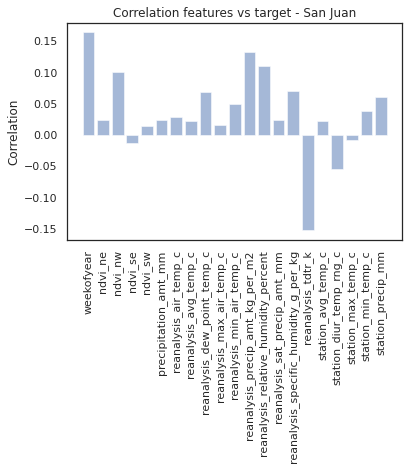

In [531]:
#Obtenemos la correlación de las caracteristicas con la variable objetivo, es decir, total_cases
import numpy as np
from scipy.stats.stats import pearsonr 

corr = [
pearsonr(train['weekofyear'], train['total_cases'])[0],
pearsonr(train['ndvi_ne'], train['total_cases'])[0],
pearsonr(train['ndvi_nw'], train['total_cases'])[0],
pearsonr(train['ndvi_se'], train['total_cases'])[0],
pearsonr(train['ndvi_sw'], train['total_cases'])[0],
pearsonr(train['precipitation_amt_mm'], train['total_cases'])[0],
pearsonr(train['reanalysis_air_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_avg_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_dew_point_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_max_air_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_min_air_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_precip_amt_kg_per_m2'], train['total_cases'])[0],
pearsonr(train['reanalysis_relative_humidity_percent'], train['total_cases'])[0],
pearsonr(train['reanalysis_sat_precip_amt_mm'], train['total_cases'])[0],
pearsonr(train['reanalysis_specific_humidity_g_per_kg'], train['total_cases'])[0],
pearsonr(train['reanalysis_tdtr_k'], train['total_cases'])[0],
pearsonr(train['station_avg_temp_c'], train['total_cases'])[0],
pearsonr(train['station_diur_temp_rng_c'], train['total_cases'])[0],
pearsonr(train['station_max_temp_c'], train['total_cases'])[0],
pearsonr(train['station_min_temp_c'], train['total_cases'])[0],
pearsonr(train['station_precip_mm'], train['total_cases'])[0]
]


features= (
'weekofyear',
'ndvi_ne',
'ndvi_nw',
'ndvi_se',
'ndvi_sw',
'precipitation_amt_mm',
'reanalysis_air_temp_c',
'reanalysis_avg_temp_c',
'reanalysis_dew_point_temp_c',
'reanalysis_max_air_temp_c',
'reanalysis_min_air_temp_c',
'reanalysis_precip_amt_kg_per_m2',
'reanalysis_relative_humidity_percent',
'reanalysis_sat_precip_amt_mm',
'reanalysis_specific_humidity_g_per_kg',
'reanalysis_tdtr_k',
'station_avg_temp_c',
'station_diur_temp_rng_c',
'station_max_temp_c',
'station_min_temp_c',
'station_precip_mm'
)




y_pos = np.arange(len(features))
 
plt.bar(y_pos, corr, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Correlation')
plt.title('Correlation features vs target - San Juan')
plt.xticks(rotation='vertical')
plt.show()

Teniendo en cuenta el analisis anterior,vemos que hay variables que estan visiblemente mas correlacionadas con la variable objetivo, con lo cual finalmente nos quedamos con la seleccion de las siguientes variables:

In [534]:
selected_features_1= ['weekofyear',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k',
                      'total_cases'
                     ]
selected_features_t= ['weekofyear',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k',
                     ]

In [535]:
train=df_train_sj[selected_features_1]
test=df_test_sj[selected_features_t]


##Normalizacion de datos

Normalizamos los datos a partir de los coeficientes mínimo y máximo 

In [536]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[selected_features_1])
X_train

array([[0.32692308, 0.3181382 , 0.46920821, 0.27403019, 0.41395349,
        0.13793103],
       [0.34615385, 0.51021387, 0.26304985, 0.45595261, 0.33023256,
        0.17241379],
       [0.36538462, 0.73498766, 0.38269795, 0.65335372, 0.30697674,
        0.13793103],
       ...,
       [0.26923077, 0.39786126, 0.51319648, 0.29696159, 0.26976744,
        0.03448276],
       [0.28846154, 0.26631478, 0.07067449, 0.25339194, 0.46511628,
        0.10344828],
       [0.30769231, 0.49060872, 0.03181818, 0.49589146, 0.84651163,
        0.17241379]])

##Parametrización los datos 

Datos de la ciudad de  San Juan


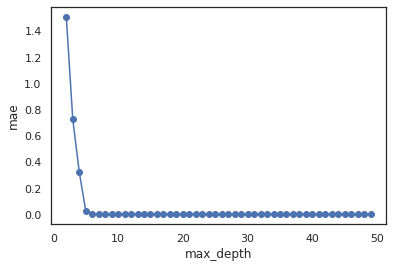

In [537]:
# Compute the max 
from sklearn.tree import DecisionTreeRegressor
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)

    regressor.fit(train[selected_features_1], train['total_cases'])

    pred_values = regressor.predict(train[selected_features_1])

    maev = mean_absolute_error(train['total_cases'],pred_values)
    mae.append(maev)
    
# Plot mae   
print ('Datos de la ciudad de  San Juan')
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

Un árbol muy profundo aprenderá con muy poco error el valor del conjunto de entrenamiento. Pero el problema está en el sobreaprendizaje, es decir, aprenderemos muy en detalle las observaciones del conjunto de entrenamiento pero seremos muy poco flexibles ante nuevas circunstancias. 

Para evitar este sobreaprendizaje vamos a probar a realizar **evaluación cruzada**, es decir, evaluar las parametrizaciones ante diferentes subconjuntos de entrenamiento y de test.

Min Value 4.7326669869422995 (2)


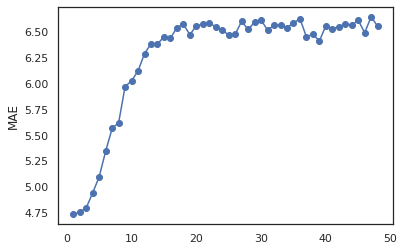

In [538]:
# CROSS VALIDATION ANALYSIS
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = True, random_state=0) # 

# reset index
train.reset_index(drop = True, inplace = True)
train.head()

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

  
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   

plt.show() 



In [539]:
#Valores del Cross Validation: Precisión por Profundidad
total_scores

[4.7326669869422995,
 4.755500410786591,
 4.796917903403629,
 4.941942826859339,
 5.098028132339602,
 5.345032189265504,
 5.566102339966244,
 5.620128531476342,
 5.971061429662818,
 6.0268360637731995,
 6.122904072691466,
 6.290500201003715,
 6.3853681528546495,
 6.381245003391955,
 6.454890326219906,
 6.439937589288436,
 6.541486688526684,
 6.575576166194976,
 6.473032078389691,
 6.560280151720993,
 6.57504133300978,
 6.5848245158479015,
 6.551629919035702,
 6.519169167038352,
 6.468603610046424,
 6.477499127167219,
 6.603373518465806,
 6.523748010418369,
 6.595554040346268,
 6.6142966359245365,
 6.518641630666889,
 6.564364856194059,
 6.56608258131129,
 6.542319803634607,
 6.587585286592533,
 6.627736764256089,
 6.4528374200823775,
 6.4778199430721894,
 6.411746651864386,
 6.560731824655818,
 6.532783082782805,
 6.549795878489408,
 6.5786109006589495,
 6.566212749914223,
 6.6126739301507005,
 6.49316558656191,
 6.647294069171322,
 6.55348387066599]

##Constructor del modelo 



In [541]:
# constructor
regressor = DecisionTreeRegressor(max_depth = max_depth)
# fit and predict

regressor.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = regressor.predict(test)
#mae = mean_absolute_error(test['count'], y_pred)
#print ('MAE', mae)
# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output1 = pd.DataFrame({ 'city': df_test_sj['city'], 'year': df_test_sj['year'], 'weekofyear': df_test_sj['weekofyear'],'total_cases': res })


#Modelo para la ciudad de Iquitos

En este apartado se probara realizar modelos supervisados para la ciudad de Iquitos


In [542]:
selected_features= ['reanalysis_max_air_temp_c',
                      'reanalysis_dew_point_temp_c',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k',
                      'station_diur_temp_rng_c',
                      'station_max_temp_c',
                      'station_precip_mm',
                      'total_cases']

## Correlación entre variables

Con el fin de que obtener un mejor rendimiento en el algoritmo de clustering será necesario identificar aquellas variables que son redundantes, es decir, se puede asumir que representan lo mismo, en este caso se puede utilizar el análisis de correlaciones. 

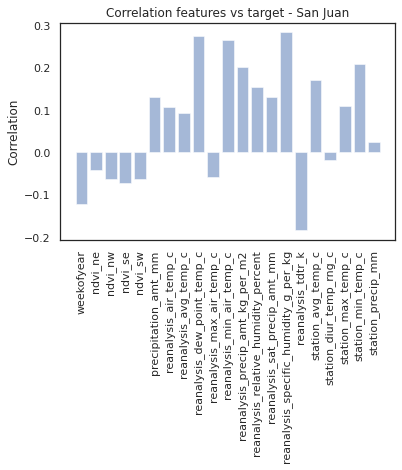

In [344]:
#Obtenemos la correlación de las caracteristicas con la variable objetivo, es decir, total_cases
import numpy as np
from scipy.stats.stats import pearsonr 

corr = [
pearsonr(train['weekofyear'], train['total_cases'])[0],
pearsonr(train['ndvi_ne'], train['total_cases'])[0],
pearsonr(train['ndvi_nw'], train['total_cases'])[0],
pearsonr(train['ndvi_se'], train['total_cases'])[0],
pearsonr(train['ndvi_sw'], train['total_cases'])[0],
pearsonr(train['precipitation_amt_mm'], train['total_cases'])[0],
pearsonr(train['reanalysis_air_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_avg_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_dew_point_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_max_air_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_min_air_temp_c'], train['total_cases'])[0],
pearsonr(train['reanalysis_precip_amt_kg_per_m2'], train['total_cases'])[0],
pearsonr(train['reanalysis_relative_humidity_percent'], train['total_cases'])[0],
pearsonr(train['reanalysis_sat_precip_amt_mm'], train['total_cases'])[0],
pearsonr(train['reanalysis_specific_humidity_g_per_kg'], train['total_cases'])[0],
pearsonr(train['reanalysis_tdtr_k'], train['total_cases'])[0],
pearsonr(train['station_avg_temp_c'], train['total_cases'])[0],
pearsonr(train['station_diur_temp_rng_c'], train['total_cases'])[0],
pearsonr(train['station_max_temp_c'], train['total_cases'])[0],
pearsonr(train['station_min_temp_c'], train['total_cases'])[0],
pearsonr(train['station_precip_mm'], train['total_cases'])[0]
]


features= (
'weekofyear',
'ndvi_ne',
'ndvi_nw',
'ndvi_se',
'ndvi_sw',
'precipitation_amt_mm',
'reanalysis_air_temp_c',
'reanalysis_avg_temp_c',
'reanalysis_dew_point_temp_c',
'reanalysis_max_air_temp_c',
'reanalysis_min_air_temp_c',
'reanalysis_precip_amt_kg_per_m2',
'reanalysis_relative_humidity_percent',
'reanalysis_sat_precip_amt_mm',
'reanalysis_specific_humidity_g_per_kg',
'reanalysis_tdtr_k',
'station_avg_temp_c',
'station_diur_temp_rng_c',
'station_max_temp_c',
'station_min_temp_c',
'station_precip_mm'
)




y_pos = np.arange(len(features))
 
plt.bar(y_pos, corr, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Correlation')
plt.title('Correlation features vs target - San Juan')
plt.xticks(rotation='vertical')
plt.show()

Teniendo en cuenta el analisis anterior,vemos que hay variables que estan visiblemente mas correlacionadas con la variable objetivo, con lo cual finalmente nos quedamos con la seleccion de las siguientes variables:

In [543]:
selected_features_1= ['reanalysis_dew_point_temp_c',
                      'reanalysis_min_air_temp_c',
                      'reanalysis_specific_humidity_g_per_kg',
                      'station_min_temp_c',
                      'total_cases'
                     ]
selected_features_t= ['reanalysis_dew_point_temp_c',
                      'reanalysis_min_air_temp_c',
                      'reanalysis_specific_humidity_g_per_kg',
                      'station_min_temp_c',
                     ]
                                         

In [544]:
train=df_train_iq[selected_features_1]
test=df_test_iq[selected_features_t]

##Normalizacion de datos

Normalizamos los datos a partir de los coeficientes mínimo y máximo 

In [545]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[selected_features_1])
X_train

array([[0.56340718, 0.63291139, 0.54371257, 0.43548387, 0.        ],
       [0.58670741, 0.37974684, 0.56903336, 0.4516129 , 0.        ],
       [0.62203972, 0.56962025, 0.59982891, 0.43548387, 0.        ],
       ...,
       [0.60580596, 0.5443038 , 0.58648417, 0.19354839, 0.03448276],
       [0.58212376, 0.48101266, 0.56338751, 0.48387097, 0.03448276],
       [0.64667685, 0.53164557, 0.62805817, 0.67741935, 0.13793103]])

##Parametrización los datos 

Datos de la ciudad de  San Juan


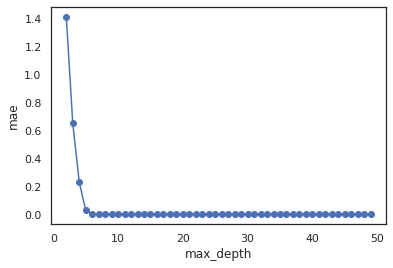

In [546]:
# Compute the max 
from sklearn.tree import DecisionTreeRegressor
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)

    regressor.fit(train[selected_features_1], train['total_cases'])

    pred_values = regressor.predict(train[selected_features_1])

    maev = mean_absolute_error(train['total_cases'],pred_values)
    mae.append(maev)
    
# Plot mae   
print ('Datos de la ciudad de  San Juan')
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

Un árbol muy profundo aprenderá con muy poco error el valor del conjunto de entrenamiento. Pero el problema está en el sobreaprendizaje, es decir, aprenderemos muy en detalle las observaciones del conjunto de entrenamiento pero seremos muy poco flexibles ante nuevas circunstancias. 

Para evitar este sobreaprendizaje vamos a probar a realizar **evaluación cruzada**, es decir, evaluar las parametrizaciones ante diferentes subconjuntos de entrenamiento y de test.

Min Value 4.764864684230784 (2)


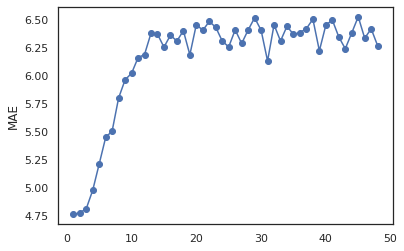

In [547]:
# CROSS VALIDATION ANALYSIS
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = True, random_state=0) # 

# reset index
train.reset_index(drop = True, inplace = True)
train.head()

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

  
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   

plt.show() 



In [548]:
#Valores del Cross Validation: Precisión por Profundidad
total_scores

[4.764864684230784,
 4.778998076118747,
 4.815832498550071,
 4.980121601279307,
 5.214197676380663,
 5.450720175571104,
 5.507883930032817,
 5.802106041434562,
 5.963690540183129,
 6.0218987626253515,
 6.160481711889299,
 6.189056550173684,
 6.378571095087851,
 6.3707836409223955,
 6.254674880448783,
 6.360358687365091,
 6.309221620950761,
 6.400796038293021,
 6.186421265120914,
 6.456084204680328,
 6.404699516760876,
 6.483349204763398,
 6.431375683573117,
 6.30910108674156,
 6.256632631878514,
 6.4086907291238076,
 6.287544134825431,
 6.407205540286569,
 6.5161795009607975,
 6.405683401661091,
 6.131749516986188,
 6.453754017084393,
 6.309560030199757,
 6.44136682996635,
 6.367411784716645,
 6.38506617746992,
 6.419920260951558,
 6.5038234315575325,
 6.222491661346323,
 6.450853546903931,
 6.4966301425351345,
 6.345515359359153,
 6.240624021692987,
 6.381758690407958,
 6.525414998355108,
 6.334236832646299,
 6.4182673414006715,
 6.266722844529641]

##Constructor del modelo 



In [550]:
# constructor
regressor = DecisionTreeRegressor(max_depth = max_depth)
# fit and predict

regressor.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = regressor.predict(test)
#mae = mean_absolute_error(test['count'], y_pred)
#print ('MAE', mae)
# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output2 = pd.DataFrame({ 'city': df_test_iq['city'], 'year': df_test_iq['year'], 'weekofyear': df_test_iq['weekofyear'],'total_cases': res })


#Modelo San Juan (RamdonForest)

In [57]:
selected_features_1= ['weekofyear',
                     'reanalysis_max_air_temp_c',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k'
                     ]

In [58]:
selected_features_1= ['weekofyear',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k',
                      'total_cases'
                     ]
selected_features_t= ['weekofyear',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k',
                     ]

In [59]:
train=df_train_sj[selected_features_1]
test=df_test_sj[selected_features_t]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor() 


In [61]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [62]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }


In [63]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv=5)

# Fit the random search model
grid_regres.fit(X = train.drop(['total_cases'], axis=1), 
                           y = train['total_cases'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

In [64]:
report(grid_regres.cv_results_, n_top = 10)

Model with rank: 1
Mean validation score: -0.042 (std: 0.128)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 128}

Model with rank: 2
Mean validation score: -0.045 (std: 0.177)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 3
Mean validation score: -0.046 (std: 0.130)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 6, 'n_estimators': 64}

Model with rank: 4
Mean validation score: -0.046 (std: 0.131)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 128}

Model with rank: 5
Mean validation score: -0.047 (std: 0.129)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_est

In [65]:
grid_regres.best_estimator_

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=12,
                      min_samples_split=4, n_estimators=128)

In [66]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = best_grid.predict(test)

# EVALUATE 
from sklearn.metrics import mean_absolute_error
#mae = mean_absolute_error(test['count'], y_pred)
#print ('MAE', mae)


In [67]:
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output1 = pd.DataFrame({ 'city': df_test_sj['city'], 'year': df_test_sj['year'], 'weekofyear': df_test_sj['weekofyear'],'total_cases': res })


#Modelo Iquitos (Random forest)

In [68]:
selected_features_1= ['reanalysis_dew_point_temp_c',
                      'reanalysis_min_air_temp_c',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_specific_humidity_g_per_kg',
                      'reanalysis_tdtr_k',
                      'station_avg_temp_c',
                      'station_max_temp_c',
                      'station_min_temp_c'
                     ]

In [69]:
selected_features_1= ['reanalysis_dew_point_temp_c',
                      'reanalysis_min_air_temp_c',
                      'reanalysis_specific_humidity_g_per_kg',
                      'station_min_temp_c',
                      'total_cases'
                     ]
selected_features_t= ['reanalysis_dew_point_temp_c',
                      'reanalysis_min_air_temp_c',
                      'reanalysis_specific_humidity_g_per_kg',
                      'station_min_temp_c',
                     ]
                                         

In [70]:
train=df_train_iq[selected_features_1]
test=df_test_iq[selected_features_t]

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor() 


In [72]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [73]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }


In [74]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv=5)

# Fit the random search model
grid_regres.fit(X = train.drop(['total_cases'], axis=1), 
                           y = train['total_cases'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

In [75]:
report(grid_regres.cv_results_, n_top = 10)

Model with rank: 1
Mean validation score: -0.064 (std: 0.102)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 2
Mean validation score: -0.065 (std: 0.097)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 64}

Model with rank: 3
Mean validation score: -0.065 (std: 0.104)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 32}

Model with rank: 4
Mean validation score: -0.065 (std: 0.108)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 6, 'n_estimators': 128}

Model with rank: 5
Mean validation score: -0.067 (std: 0.094)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_es

In [76]:
grid_regres.best_estimator_

RandomForestRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=16,
                      n_estimators=32)

In [77]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = best_grid.predict(test)

# EVALUATE 
from sklearn.metrics import mean_absolute_error
#mae = mean_absolute_error(test['count'], y_pred)
#print ('MAE', mae)


In [78]:
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output2 = pd.DataFrame({ 'city': df_test_iq['city'], 'year': df_test_iq['year'], 'weekofyear': df_test_iq['weekofyear'],'total_cases': res })


#Salida

In [79]:
from google.colab import files
output = pd.concat([output1, output2])

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')
output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,10
1,sj,2008,19,10
2,sj,2008,20,10
3,sj,2008,21,10
4,sj,2008,22,10


# Carga de Datos en Driven Data

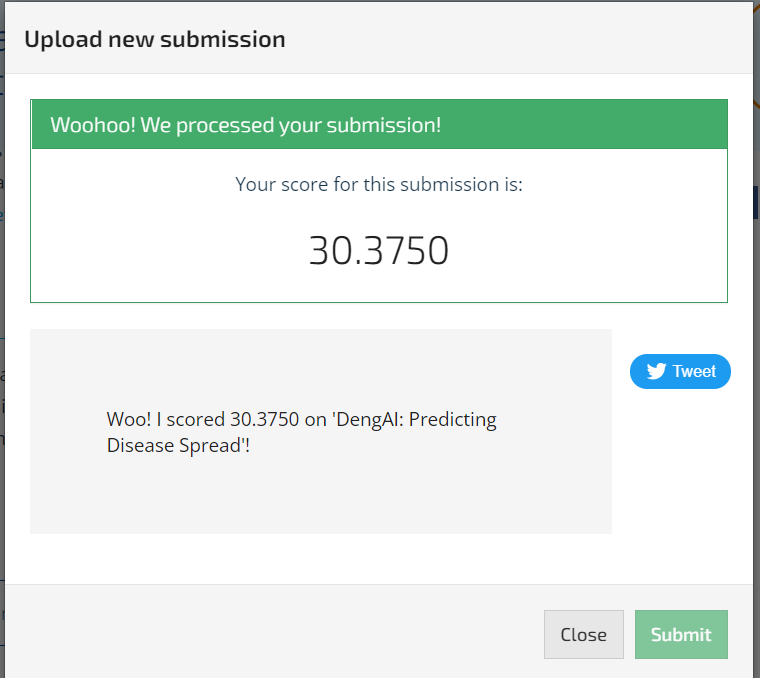

#Conclusiones